<a href="https://colab.research.google.com/github/Mandhata001/EmployeeBurnout_Analysis/blob/main/ProjectEBA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#importing Neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

Loading DATASET

In [47]:
data = pd.read_excel('employee_burnout_analysis-AI 2.xlsx')

# Exploratory Data Analysis

In [48]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [49]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

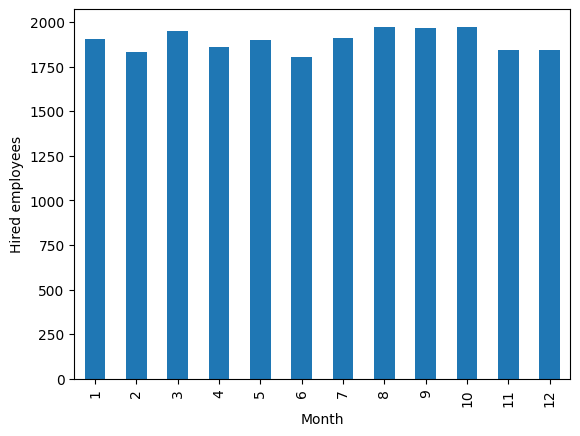

In [50]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()
data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]") # Specify time unit as nanoseconds
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month' , ylabel="Hired employees")

In [51]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
2,69
3,307
4,205
...,...
22745,364
22746,18
22747,309
22748,9


In [52]:
# Select only numeric colums before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Days                   -0.001358
Name: Burn Rate, dtype: float64


In [53]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546
Burn Rate,1.000000
Days,-0.001358


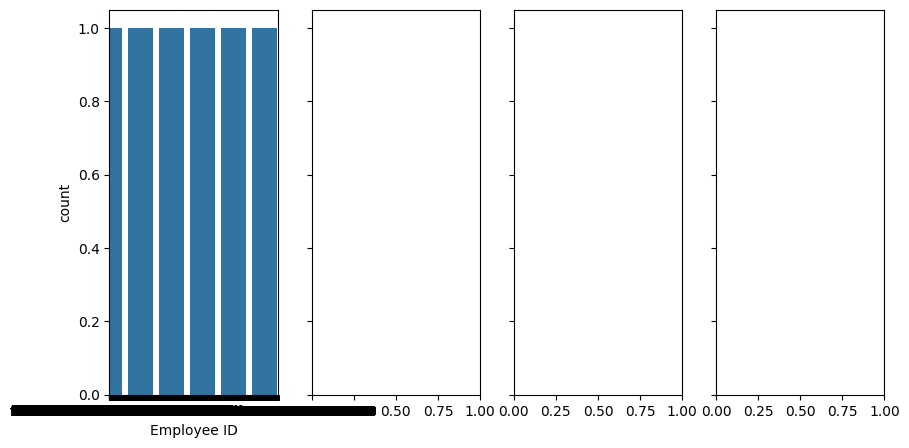

In [54]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols =len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
  sns.countplot(x=c, data=data, ax=ax[i])
  plt.show()

## One-Hot Encoding for categorical features


In [55]:
from itertools import dropwhile
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  data = pd.get_dummies(data, columns =['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
  data.head()
  encoded_columns = data.columns
else:
  print("Error: One or more of the specified columns are not present in the DataFrame.")
  print(data.columns)


In [56]:
data

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,fffe32003000360033003200,2008-09-30,2,3.0,3.8,0.16,273,True,False,False
1,fffe3700360033003500,2008-11-30,1,2.0,5.0,0.36,334,True,True,True
2,fffe31003300320037003900,2008-03-10,2,NaN,5.8,0.49,69,False,True,False
3,fffe32003400380032003900,2008-11-03,1,1.0,2.6,0.20,307,True,True,True
4,fffe31003900340031003600,2008-07-24,3,7.0,6.9,0.52,205,True,False,False
...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,1,3.0,NaN,0.41,364,True,False,False
22746,fffe33003000350031003800,2008-01-19,3,6.0,6.7,0.59,18,False,True,False
22747,fffe390032003000,2008-11-05,3,7.0,NaN,0.72,309,True,True,True
22748,fffe33003300320036003900,2008-01-10,2,5.0,5.9,0.52,9,True,False,False


# Preprocessing


In [57]:
# Split df into X and Y
y = data['Burn Rate']
x = data.drop('Burn Rate', axis=1)

In [61]:
# Train-Test split
# Check and convert non-numeric columns to NaN
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
# Handle NaN values # Option 1: Fill NaN with a specific value (e.g., 0)
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
# Scale x
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

In [62]:
x_train

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Days,Company Type_Service,WFH Setup Available_Yes,Gender_Male
18275,0.0,-1.255245,-0.159082,0.350737,0.448078,-1.255245,-1.368697,0.919924,-0.954561
13833,0.0,1.052588,0.722958,0.350737,0.732187,1.052588,0.730622,-1.087046,-0.954561
11163,0.0,-1.416698,0.722958,0.350737,-2.108902,-1.416698,0.730622,-1.087046,1.047603
9522,0.0,-1.502174,-1.041122,-0.541813,-0.810119,-1.502174,-1.368697,0.919924,-0.954561
15832,0.0,0.492250,0.722958,-0.095538,0.001621,0.492250,0.730622,0.919924,-0.954561
...,...,...,...,...,...,...,...,...,...
10955,0.0,-0.894349,0.722958,0.350737,-2.108902,-0.894349,-1.368697,0.919924,1.047603
17289,0.0,0.634709,-0.159082,-0.541813,0.042208,0.634709,0.730622,0.919924,1.047603
5192,0.0,0.720184,0.722958,0.350737,0.285730,0.720184,0.730622,0.919924,-0.954561
12172,0.0,0.501747,0.722958,1.243287,1.706275,0.501747,0.730622,-1.087046,-0.954561


# Linear Regression


In [63]:
# Assuming your dataframe is 'data'
# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Print non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Convert non-numeric columns to numeric if possible, set errors='coerce' to convert non-convertible values to NaN
for column in non_numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle NaN values
data.fillna(0, inplace=True)  # Replace NaNs with 0, or you can drop them with data.dropna(inplace=True)

# Split data into features (X) and target (y)
y = data['Burn Rate']
x = data.drop('Burn Rate', axis=1)

# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert back to DataFrame (optional, for easier handling)
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

# Create and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

# Predict the values for the test set
y_pred = linear_regression_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Non-numeric columns: Index(['Employee ID', 'Date of Joining', 'Company Type_Service',
       'WFH Setup Available_Yes', 'Gender_Male'],
      dtype='object')
Mean Squared Error (MSE): 0.020897226871671105
Mean Absolute Error (MAE): 0.09806874399422424
R-squared (R2): 0.5551157067592525


# KNN Regression Model

In [71]:
# Create and train the KNN Regression model
print("Creating and training the KNN Regression model...")
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)
print("Model trained successfully!")

# Predict the values for the test set
print("Predicting the test set values...")
y_pred_knn = knn_regressor.predict(x_test)
print("Prediction complete!")

# Evaluate the model
print("Evaluating the model...")
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - Mean Squared Error (MSE): {mse_knn}")
print(f"KNN Regression - Mean Absolute Error (MAE): {mae_knn}")
print(f"KNN Regression - R-squared (R2): {r2_knn}")



Creating and training the KNN Regression model...
Model trained successfully!
Predicting the test set values...
Prediction complete!
Evaluating the model...
KNN Regression - Mean Squared Error (MSE): 0.018333847055376502
KNN Regression - Mean Absolute Error (MAE): 0.0849147377673601
KNN Regression - R-squared (R2): 0.6096878959249734
